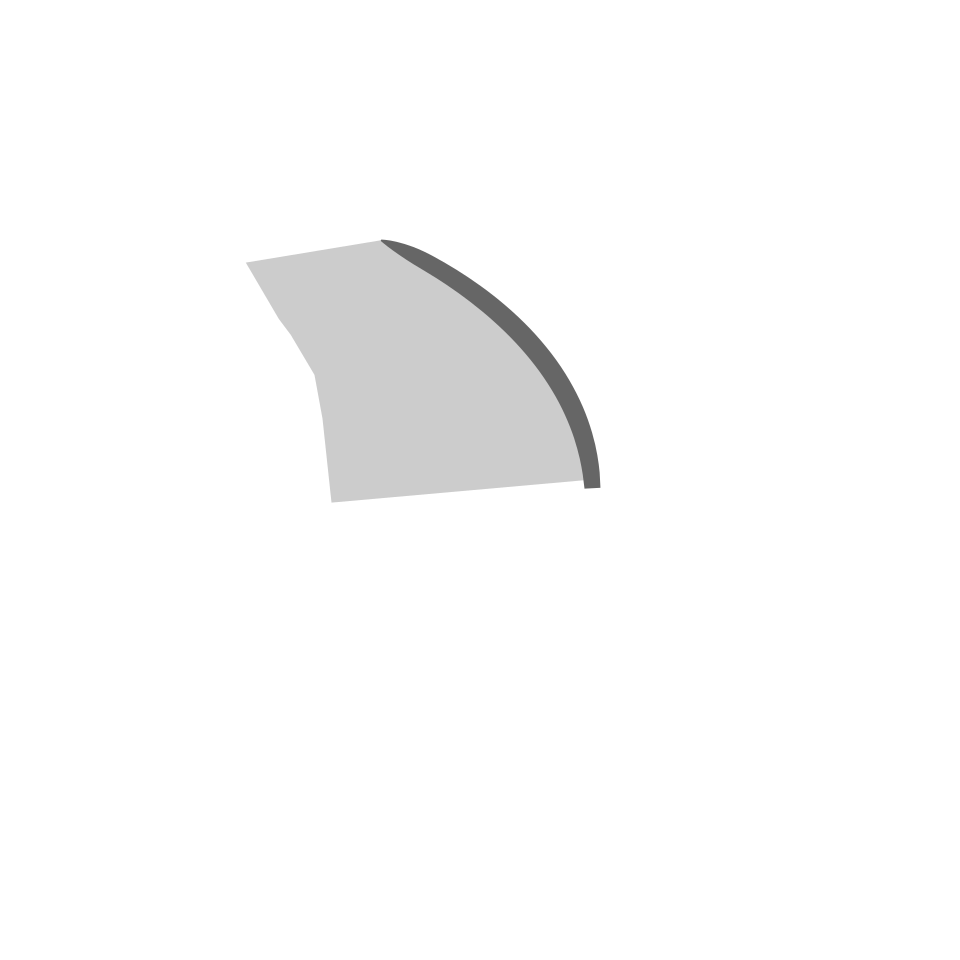

In [26]:
from twipfr import FLADocument
from helper import list_o_svgs_to_html

BASE_DIR = "../assets/base/LIBRARY/PonyTemplate►/PonyTemplate►BodyParts/" # /PonyTemplate►Wings
doc = FLADocument(BASE_DIR+"PonyTemplate►FrontLegUpper.xml")
doc.draw_frame(-2, 240, 960)

In [28]:
from path import draw_path, draw_paths, find_subpaths, addEdgeToGroup, reverse_draw_commands, findContours, disjoint_path_join, crop_path, get_disjoint, closed, get_pt, get_startpt
from consts import Path, Edge, DrawCommand, FillStyle

In [36]:
doc.animations[-2][1].paths[0]

Path(edges=[Edge(type=<DrawCommand.MOVETO: 0>, data=[240.15, 321.15], S=0), Edge(type=<DrawCommand.LINETO: 1>, data=[244.9, 327.0], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[250.85, 334.55, 257.2, 343.45], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[277.35, 371.75, 292.8, 401.65], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[342.3, 497.25, 326.35, 573.0], S=0)], stroke=Stroke(color='#666666', scaleMode='normal', caps='none', weight='18', joints='miter', miterLimit='10'), fill0=None, fill1=None)

In [38]:
[i*20 for i in [326.35, 573.0]]

[6527.0, 11460.0]

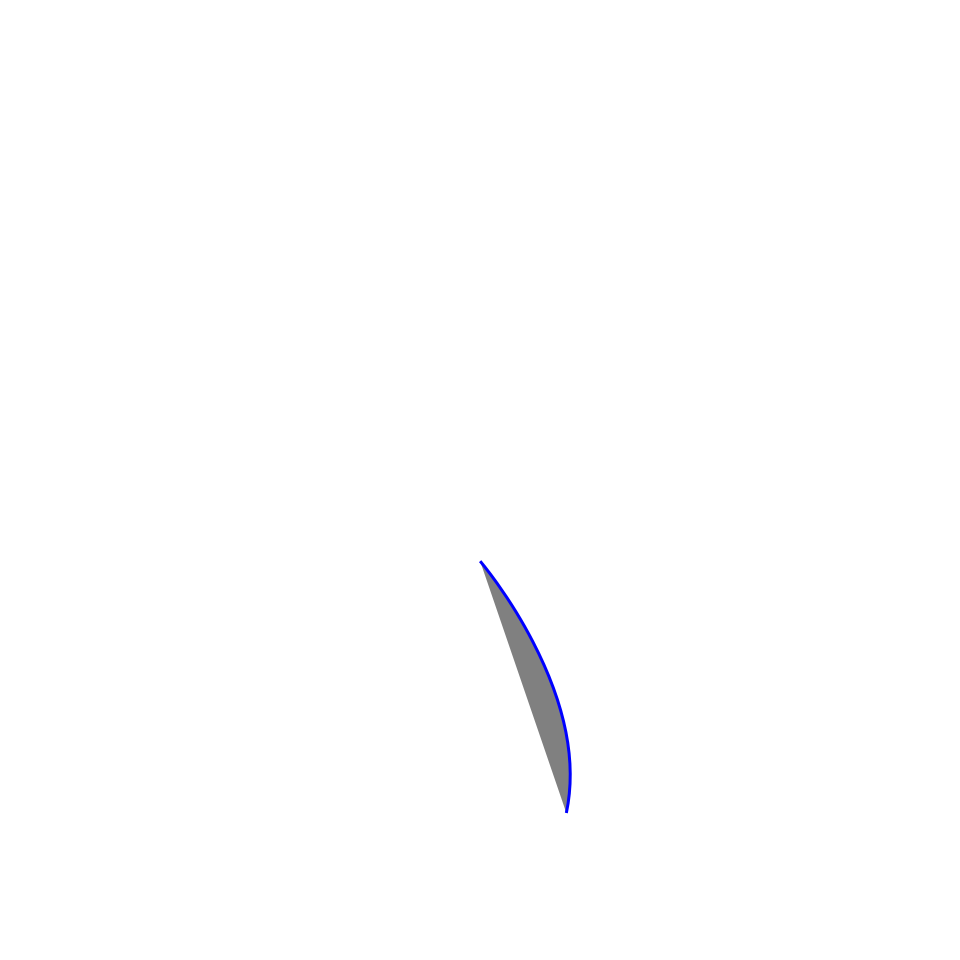

In [33]:
draw_paths()

In [42]:
from path import draw_path, draw_paths, find_subpaths, addEdgeToGroup, reverse_draw_commands, findContours, disjoint_path_join, crop_path
shape = doc.animations[-2][1]
edgeGroups = {}
split_paths = []
for path in shape.paths:
    split_paths.extend(find_subpaths(path))

for path in split_paths: # split_paths[2:6]+split_paths[0:1]
    if path.fill0 != None: addEdgeToGroup(edgeGroups, path.fill0,  path)
    if path.fill1 != None: addEdgeToGroup(edgeGroups, path.fill1, reverse_draw_commands(path))
filledRegs = {}
for fillStyle, group in edgeGroups.items():
    filledRegs[fillStyle] = findContours(group, fillStyle)

mergedRegs = {}
for fillStyle, group in filledRegs.items():
    # need to merge fills down to single path
    a = findContours([path for path in group], fillStyle)
    ret = a[0]
    for i in range(1, len(a)):
        ret = disjoint_path_join(ret, a[i])
    mergedRegs[fillStyle] = [ret]


In [44]:
split_paths

[Path(edges=[Edge(type=<DrawCommand.MOVETO: 0>, data=[240.15, 321.15], S=0), Edge(type=<DrawCommand.LINETO: 1>, data=[244.9, 327.0], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[250.85, 334.55, 257.2, 343.45], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[277.35, 371.75, 292.8, 401.65], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[342.3, 497.25, 326.35, 573.0], S=0)], stroke=Stroke(color='#666666', scaleMode='normal', caps='none', weight='18', joints='miter', miterLimit='10'), fill0=None, fill1=None)]

In [46]:
filledRegs

{}

In [17]:
len(mergedRegs[FillStyle(color='#666666', alpha=1)])

1

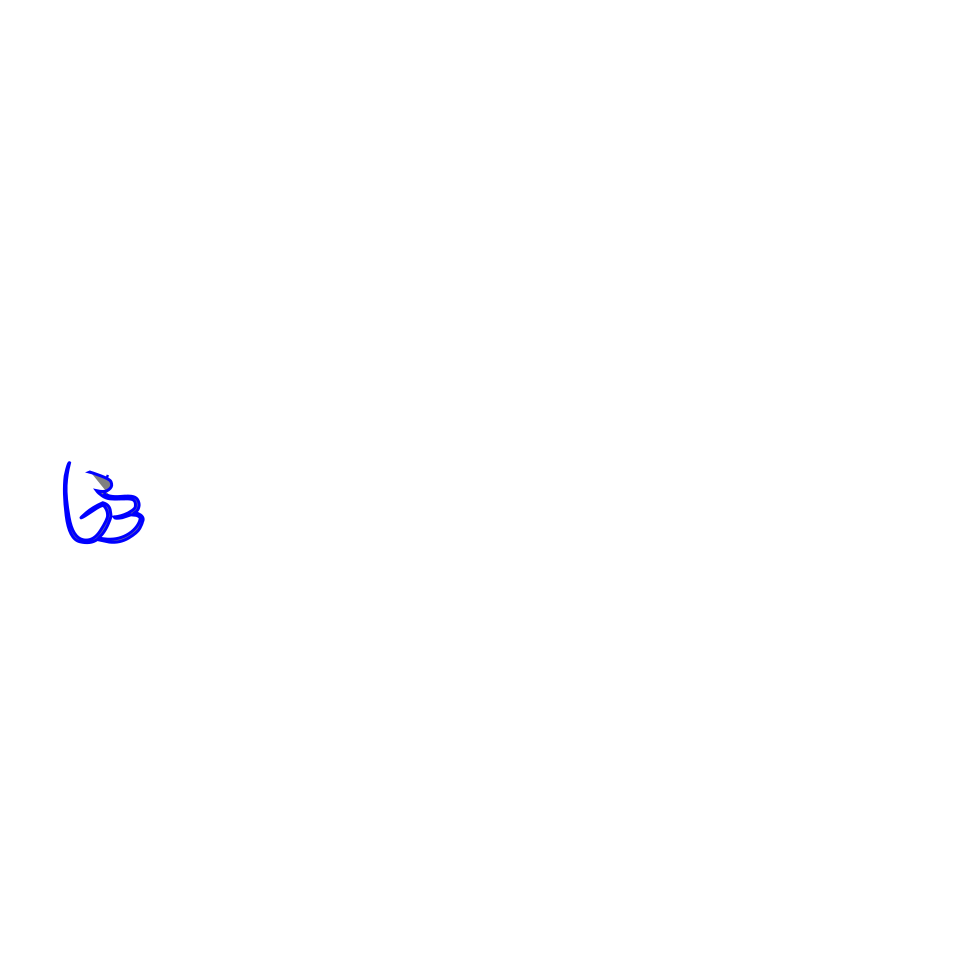

In [25]:
draw_paths([filledRegs[FillStyle(color='#666666', alpha=1)][2]])

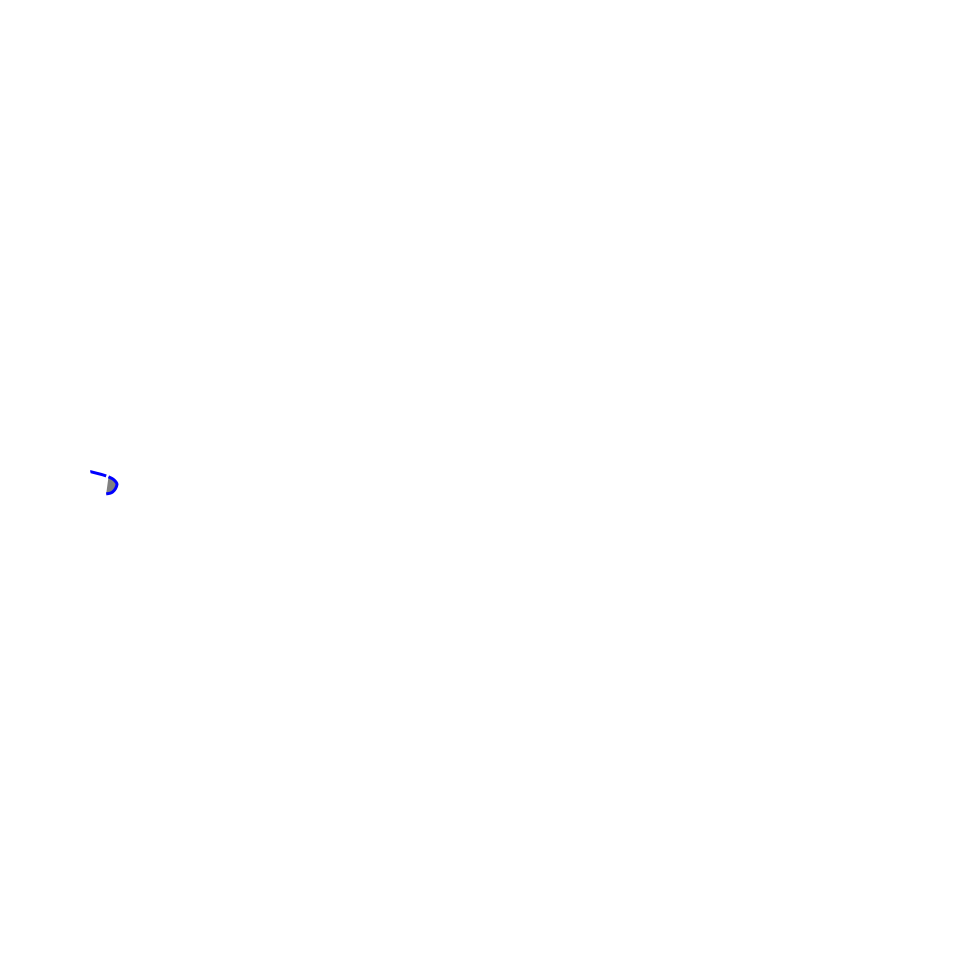

In [24]:
draw_paths([filledRegs[FillStyle(color='#666666', alpha=1)][0], filledRegs[FillStyle(color='#666666', alpha=1)][1]])

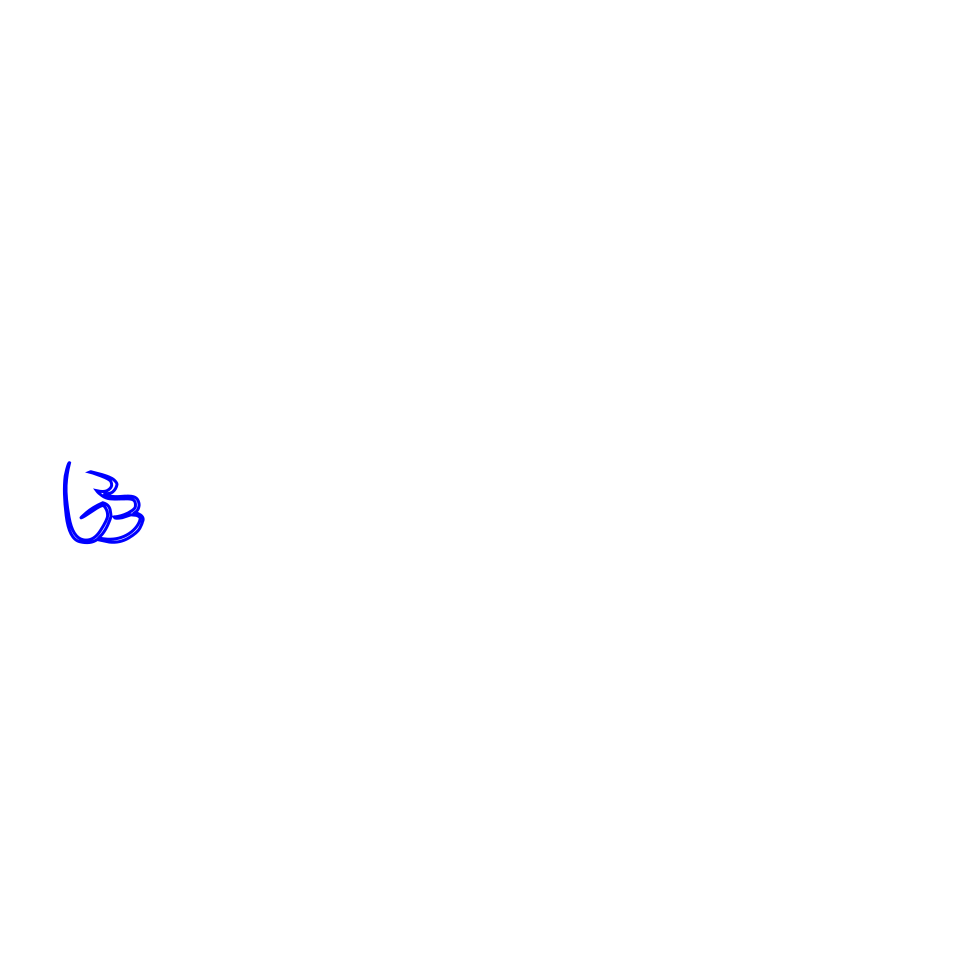

In [18]:
draw_path(mergedRegs[FillStyle(color='#666666', alpha=1)][0])

In [10]:
testcase = Path(edges=[
    Edge(type=DrawCommand.MOVETO, data=[12.8, -2.2], S=0),
    Edge(type=DrawCommand.LINETO, data=[-8.05, 11.15], S=0),
    Edge(type=DrawCommand.LINETO, data=[-7.85, 11.5], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[-5.65, 18.5, -4.65, 28.3], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[-2.85, 47.75, -8.3, 65.2], S=0),
    Edge(type=DrawCommand.MOVETO, data=[25.9, 64.5], S=0),
    Edge(type=DrawCommand.LINETO, data=[25.95, 64.1], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[26.35, 37.6, 19.85, 15.55], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[16.6, 4.4, 12.8, -2.2], S=0)
], stroke=None, fill0='#CCCCCC', fill1=None)
if (get_disjoint(testcase) and closed(testcase)):
    Path(edges=testcase.edges[get_disjoint(testcase):]+testcase.edges[1:get_disjoint(testcase)], stroke=None, fill0='#CCCCCC', fill1=None)

[Edge(type=<DrawCommand.MOVETO: 0>, data=[25.9, 64.5], S=0), Edge(type=<DrawCommand.LINETO: 1>, data=[25.95, 64.1], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[26.35, 37.6, 19.85, 15.55], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[16.6, 4.4, 12.8, -2.2], S=0), Edge(type=<DrawCommand.LINETO: 1>, data=[-8.05, 11.15], S=0), Edge(type=<DrawCommand.LINETO: 1>, data=[-7.85, 11.5], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[-5.65, 18.5, -4.65, 28.3], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[-2.85, 47.75, -8.3, 65.2], S=0)]


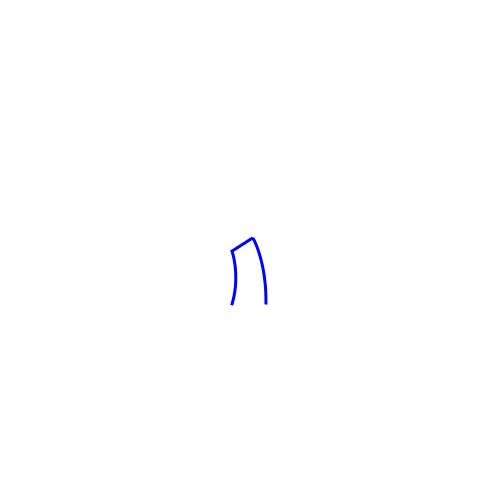

In [47]:
# rotate path to remove moveto
draw_path(Path(edges=[
    Edge(type=DrawCommand.MOVETO, data=[12.8, -2.2], S=0),
    Edge(type=DrawCommand.LINETO, data=[-8.05, 11.15], S=0),
    Edge(type=DrawCommand.LINETO, data=[-7.85, 11.5], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[-5.65, 18.5, -4.65, 28.3], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[-2.85, 47.75, -8.3, 65.2], S=0),
    Edge(type=DrawCommand.MOVETO, data=[25.9, 64.5], S=0),
    Edge(type=DrawCommand.LINETO, data=[25.95, 64.1], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[26.35, 37.6, 19.85, 15.55], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[16.6, 4.4, 12.8, -2.2], S=0)
], stroke=None, fill0='#CCCCCC', fill1=None))
draw_path(Path(edges=[
    Edge(type=DrawCommand.MOVETO, data=[12.8, -2.2], S=0),
    Edge(type=DrawCommand.LINETO, data=[-8.05, 11.15], S=0),
    Edge(type=DrawCommand.LINETO, data=[-7.85, 11.5], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[-5.65, 18.5, -4.65, 28.3], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[-2.85, 47.75, -8.3, 65.2], S=0),
    Edge(type=DrawCommand.MOVETO, data=[25.9, 64.5], S=0), # make this first element, then rotate accordingly
    Edge(type=DrawCommand.LINETO, data=[25.95, 64.1], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[26.35, 37.6, 19.85, 15.55], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[16.6, 4.4, 12.8, -2.2], S=0)
], stroke=None, fill0='#CCCCCC', fill1=None))

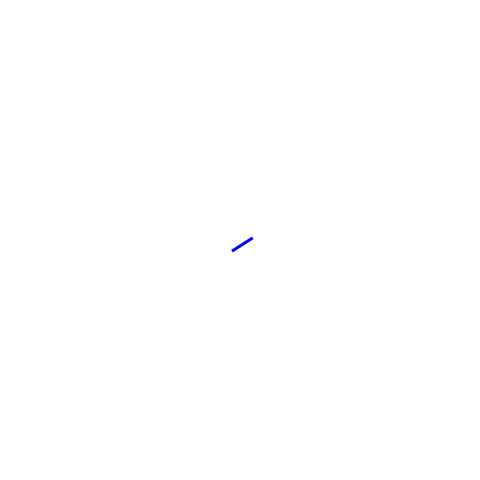

In [19]:
draw_path(split_paths[3])

In [6]:
filledRegs['#CCCCCC'][1]

Path(edges=[Edge(type=<DrawCommand.MOVETO: 0>, data=[12.8, -2.2], S=0), Edge(type=<DrawCommand.LINETO: 1>, data=[-8.05, 11.15], S=0), Edge(type=<DrawCommand.LINETO: 1>, data=[-7.85, 11.5], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[-5.65, 18.5, -4.65, 28.3], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[-2.85, 47.75, -8.3, 65.2], S=0), Edge(type=<DrawCommand.MOVETO: 0>, data=[25.9, 64.5], S=0), Edge(type=<DrawCommand.LINETO: 1>, data=[25.95, 64.1], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[26.35, 37.6, 19.85, 15.55], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[16.6, 4.4, 12.8, -2.2], S=0)], stroke=None, fill0='#CCCCCC', fill1=None)

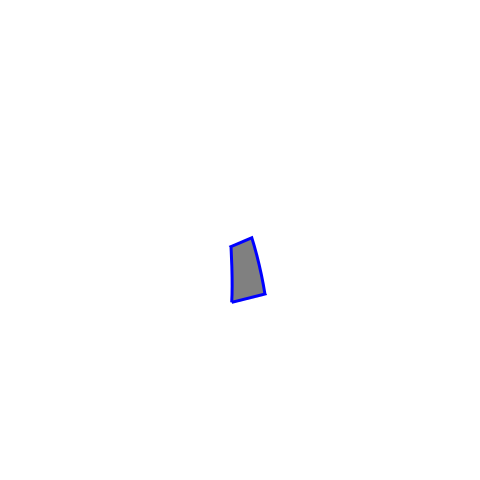

In [20]:
draw_paths(filledRegs['#CCCCCC'])

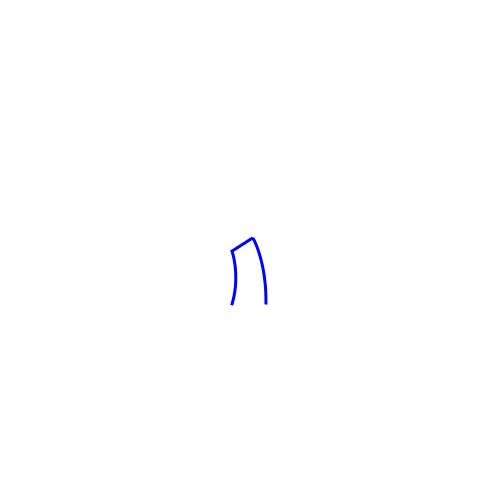

In [10]:
draw_path(filledRegs['#CCCCCC'][1])

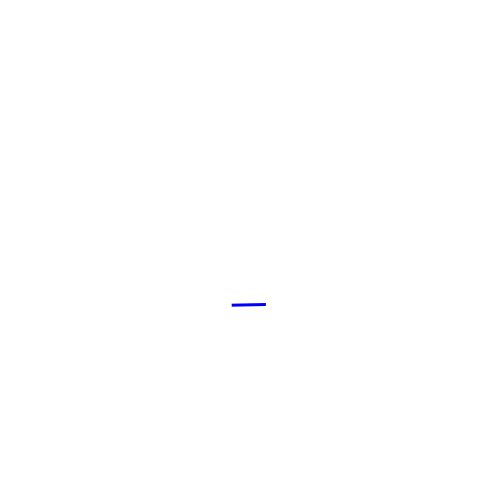

In [9]:
draw_path(filledRegs['#CCCCCC'][0])

In [15]:
[i/20 for i in [518, 1290]]

[25.9, 64.5]

In [9]:
doc.animations[0][0][0].paths

[Path(edges=[Edge(type=<DrawCommand.MOVETO: 0>, data=[12.8, -2.2], S=0), Edge(type=<DrawCommand.LINETO: 1>, data=[12.75, -2.25], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[12.45, -2.8, 12.6, -3.4], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[12.75, -4.0, 13.25, -4.3], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[13.8, -4.65, 14.4, -4.5], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[15.0, -4.35, 15.4, -3.8], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[19.3, 2.6, 22.75, 14.0], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[29.55, 36.6, 28.95, 64.6], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[28.95, 65.2, 28.45, 65.65], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[28.05, 66.05, 27.4, 66.05], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[26.75, 66.05, 26.35, 65.6], S=0), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[25.9, 65.15, 25.9, 64.5], S=0)], stroke=None, fill0=None, fill1='#666666'),
 Path(edges=[Edge(type=<DrawComman

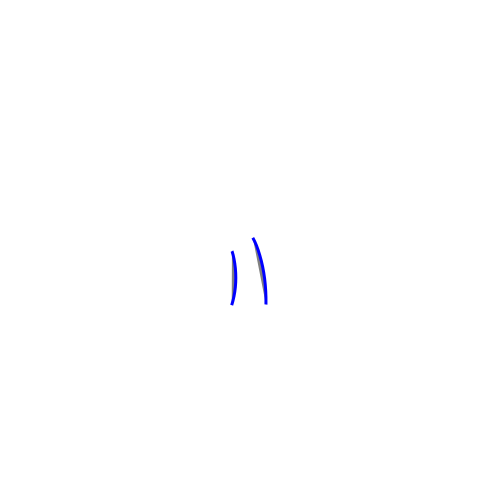

In [17]:
draw_paths([Path(edges=[
    Edge(type=DrawCommand.MOVETO, data=[12.8, -2.2], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[16.6, 4.4, 19.85, 15.55], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[26.35, 37.6, 25.95, 64.1], S=0),
    Edge(type=DrawCommand.LINETO, data=[25.9, 64.5], S=0),
    Edge(type=DrawCommand.MOVETO, data=[-8.3, 65.2], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[-2.85, 47.75, -4.65, 28.3], S=0),
    Edge(type=DrawCommand.QUADRATICTO, data=[-5.65, 18.5, -7.85, 11.5], S=0),
    Edge(type=DrawCommand.LINETO, data=[-8.05, 11.15], S=0),
], stroke=None, fill0='#666666', fill1='#CCCCCC')])

In [55]:
from path import draw_path, draw_paths, find_subpaths, addEdgeToGroup, reverse_draw_commands, findContours, disjoint_path_join, crop_path
shape = doc.animations[1][7][0]
edgeGroups = {}
split_paths = []
for path in shape.paths:
    split_paths.extend(find_subpaths(path))

for path in split_paths: # split_paths[2:6]+split_paths[0:1]
    if path.fill0 != None: addEdgeToGroup(edgeGroups, path.fill0,  path)
    if path.fill1 != None: addEdgeToGroup(edgeGroups, path.fill1, reverse_draw_commands(path))
filledRegs = {}
for fillStyle, group in edgeGroups.items():
    filledRegs[fillStyle] = findContours(group, fillStyle)


0 Edge(type=<DrawCommand.MOVETO: 0>, data=[-7.0, 99.85], S=3) Path(edges=[Edge(type=<DrawCommand.MOVETO: 0>, data=[-7.0, 99.85], S=3), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[-6.45, 99.15, -5.7, 98.45], S=2), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[-0.55, 93.15, 6.05, 94.35], S=2), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[16.75, 96.2, 13.3, 122.75], S=2), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[16.5, 129.4, 14.25, 142.95], S=2), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[13.15, 151.35, 10.1, 159.15], S=2), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[3.95, 174.85, -6.45, 173.05], S=2), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[-10.15, 172.35, -11.55, 168.65], S=2)], stroke=None, fill0=None, fill1='#666666')
1 Edge(type=<DrawCommand.LINETO: 1>, data=[-7.0, 99.85], S=2) Path(edges=[Edge(type=<DrawCommand.MOVETO: 0>, data=[-9.15, 100.85], S=2), Edge(type=<DrawCommand.LINETO: 1>, data=[-7.0, 99.85], S=2)], stroke=None, fill0=None, fill1='#CCCCCC')
15 Edge(typ

[Path(edges=[Edge(type=<DrawCommand.MOVETO: 0>, data=[6.8, 145.2], S=3), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[9.95, 140.45, 11.35, 131.9], S=3), Edge(type=<DrawCommand.LINETO: 1>, data=[11.4, 131.8], S=3), Edge(type=<DrawCommand.LINETO: 1>, data=[12.4, 128.2], S=3), Edge(type=<DrawCommand.LINETO: 1>, data=[12.5, 127.4], S=3), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[12.85, 129.55, 12.95, 131.65], S=3), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[13.35, 137.5, 12.35, 143.3], S=3), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[5.45, 171.45, -5.85, 169.45], S=3), Edge(type=<DrawCommand.LINETO: 1>, data=[-7.35, 169.35], S=3), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[-8.1, 169.1, -8.5, 167.6], S=3), Edge(type=<DrawCommand.LINETO: 1>, data=[-10.1, 161.2], S=3), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[-0.8, 157.15, 3.2, 152.15], S=3), Edge(type=<DrawCommand.QUADRATICTO: 2>, data=[5.45, 147.35, 6.8, 145.2], S=0)], stroke=None, fill0='#666666', fill1='#CCCCCC'),
 Path

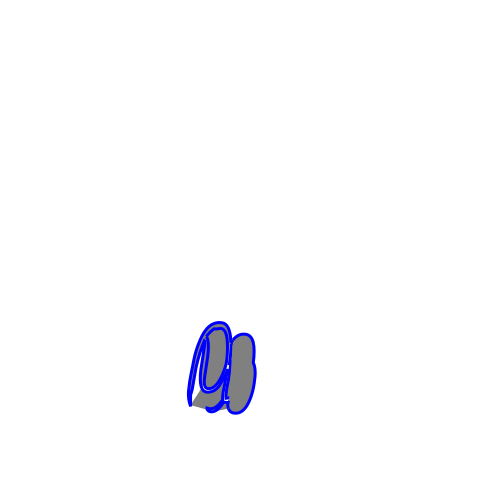

In [58]:
draw_paths(findContours(edgeGroups['#666666'], '#666666'))

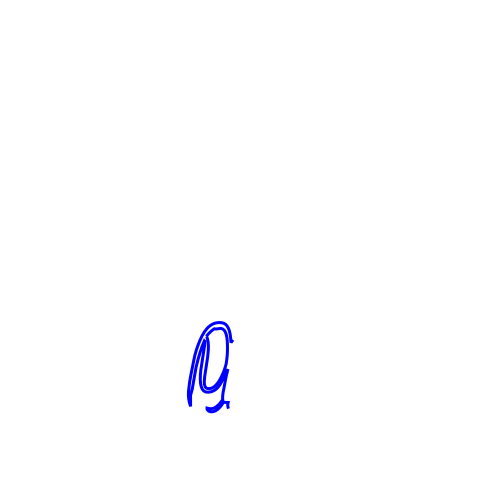

In [54]:
draw_path(disjoint_path_join(findContours(edgeGroups['#666666'], '#666666')[-2], findContours(edgeGroups['#666666'], '#666666')[-1]))